## Observations and Insights 

In [965]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import sklearn.datasets as dta

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [966]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [967]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [968]:
# Combine the data into a single dataset
df = mouse_metadata.merge(study_results, left_on = 'Mouse ID', right_on = 'Mouse ID', how = 'inner').drop_duplicates()

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [969]:
# Checking the number of mice = 249
mice_num = df['Mouse ID'].nunique()
print(f"the number of mice is {mice_num}.")

the number of mice is 249.


In [970]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups_id_timepoint = df[['Mouse ID', 'Timepoint']]
dups_id_timepoint[dups_id_timepoint.duplicated()]

,Mouse ID,Timepoint
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [971]:
# Optional: Get all the data for the duplicate mouse ID. 
dups = df[df.duplicated(['Mouse ID','Timepoint'])]
dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [972]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = df[df['Mouse ID'] != 'g989']
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [973]:
# Checking the number of mice in the clean DataFrame.
num_cleaned_mice = cleaned_df['Mouse ID'].nunique()

print(f"there are total {num_cleaned_mice} mice after cleaning the DataFrame")

there are total 248 mice after cleaning the DataFrame


## Summary Statistics

In [974]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#mean
tumor_mean = round(cleaned_df['Tumor Volume (mm3)'].mean(),2)
print(f"mean of the tumar volume is {tumor_mean}")

#median
tumor_median = round(cleaned_df['Tumor Volume (mm3)'].median(),2)
print(f"median of the tumar volume is {tumor_median}")

#variance
tumor_variance = round(cleaned_df['Tumor Volume (mm3)'].var(),2)
print(f"median of the tumar volume is {tumor_variance}")

#standard deviation
tumor_std = round(cleaned_df['Tumor Volume (mm3)'].std(),2)
print(f"std of the tumar volume is {tumor_std}")

#SEM
tumor_sem = round(cleaned_df['Tumor Volume (mm3)'].sem(),2)
print(f"sem of the tumar volume is {tumor_sem}")

#Summary statistics table
summary_table = pd.DataFrame({'mean': [tumor_mean],
                'median':[tumor_median],
                'variance':[tumor_variance],
                'std':[tumor_std],
                'sem':[tumor_sem]})

summary_table

mean of the tumar volume is 50.44
median of the tumar volume is 48.93
median of the tumar volume is 79.46
std of the tumar volume is 8.91
sem of the tumar volume is 0.21


,mean,median,variance,std,sem
0,50.44,48.93,79.46,8.91,0.21


In [975]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
cleaned_df.head()

drug_tumor_mean = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_tumor_median = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_tumor_variance = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_tumor_std = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_tumor_sem = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

table1 = pd.DataFrame(drug_tumor_mean)
summary_table = table1.rename(columns={"Tumor Volume (mm3)": "Mean"})
summary_table["Median"] = drug_tumor_median
summary_table["Variance"] = drug_tumor_variance
summary_table["std"] = drug_tumor_std
summary_table["sem"] = drug_tumor_sem

summary_table

,Mean,Median,Variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [976]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = cleaned_df.groupby(df['Drug Regimen'])['Tumor Volume (mm3)'].agg(["mean",
                                                                                  "median",
                                                                                  "var",
                                                                                  "std",
                                                                                  "sem"])

summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [977]:
plt.style.use('ggplot')

In [978]:
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


### Bar chart

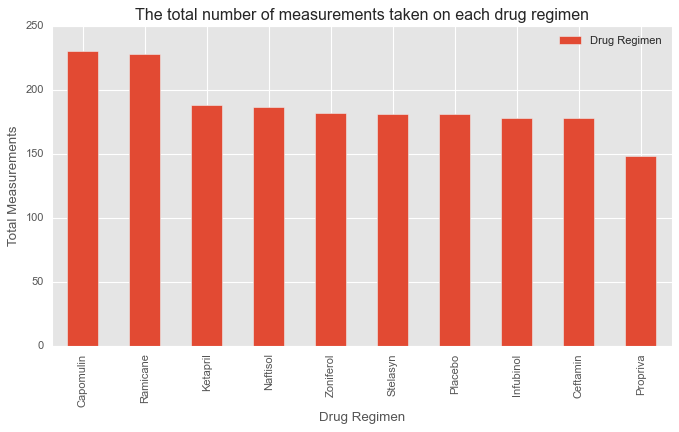

In [979]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
df_bar = pd.DataFrame(cleaned_df['Drug Regimen'].value_counts())
df_bar.plot(figsize = (10, 5), 
                        kind = 'bar',
                        title = 'The total number of measurements taken on each drug regimen', 
                        xlabel = 'Drug Regimen', 
                        ylabel = 'Total Measurements');

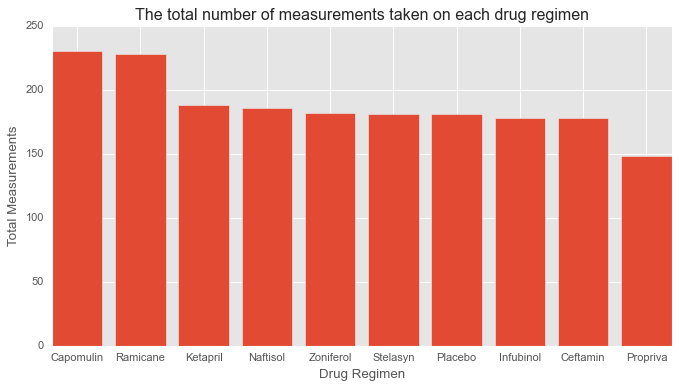

In [980]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
df_bar = pd.DataFrame(cleaned_df['Drug Regimen'].value_counts()).reset_index()
df_bar_x = list(df_bar['index'])
df_bar_y = list(df_bar['Drug Regimen'])

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.bar(df_bar_x, df_bar_y);

ax1.set(xlabel = "Drug Regimen",
      ylabel = "Total Measurements",
      title = "The total number of measurements taken on each drug regimen");

### Pie Chart

In [981]:
# Dataset
pie_chart = cleaned_df[['Mouse ID','Sex']].drop_duplicates().groupby('Sex').count().rename(columns = {'Mouse ID' : 'mice gender distribution'})
pie_chart

,mice gender distribution
Sex,
Female,123
Male,125


<AxesSubplot:ylabel='mice gender distribution'>

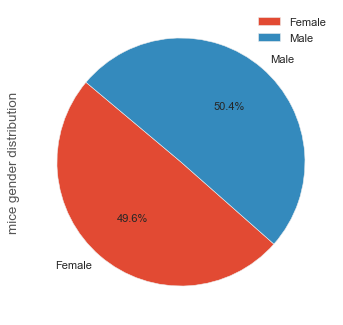

In [982]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie.plot.pie(figsize=(5, 5),
            y='mice gender distribution',
            autopct="%1.1f%%",
            startangle=140)

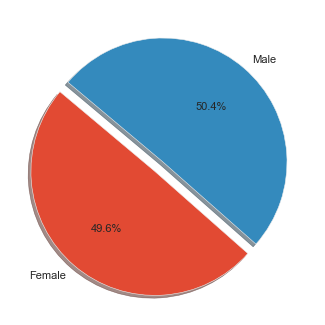

In [983]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Dataset
pie_chart = pie_chart.reset_index()
labels = list(pie_chart['Sex'])
values = list(pie_chart['mice gender distribution'])
explode = (0.1, 0)

#Pie Chart
fig2, ax2 = plt.subplots(figsize = (5,5));
ax2.pie(values,
        explode=explode,
        labels = labels,
        autopct='%1.1f%%',
        startangle=140,
        shadow=True);

## Quartiles, Outliers and Boxplots

In [984]:
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [985]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment = cleaned_df[cleaned_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
timepoint = pd.DataFrame(treatment.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max()).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge = timepoint.merge(cleaned_df, left_on = ['Drug Regimen','Mouse ID','Timepoint'], right_on = ['Drug Regimen','Mouse ID','Timepoint'])
merge

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,45,Female,9,22,38.982878,2
1,Capomulin,b742,45,Male,7,21,38.939633,0
2,Capomulin,f966,20,Male,16,17,30.485985,0
3,Capomulin,g288,45,Male,3,19,37.074024,1
4,Capomulin,g316,45,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,Ramicane,s508,45,Male,1,17,30.276232,0
96,Ramicane,u196,45,Male,18,25,40.667713,3
97,Ramicane,w678,5,Female,5,24,43.166373,0
98,Ramicane,y449,15,Male,19,24,44.183451,0


In [986]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = list(merge['Drug Regimen'].unique())
treatments

['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

In [987]:
# Create empty list to fill with tumor vol data (for plotting)
tumor = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatments:    
    tumor_vol = merge.loc[merge['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    # add subset
    tumor.append(tumor_vol)
        
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of tumor_vol is: {lowerq}")
    print(f"The upper quartile of tumor_vol is: {upperq}")
    print(f"The interquartile range of tumor_vol is: {iqr}")
    print(f"The the median of tumor_vol is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(" ")

The lower quartile of tumor_vol is: 32.37735684
The upper quartile of tumor_vol is: 40.1592203
The interquartile range of tumor_vol is: 7.781863460000004
The the median of tumor_vol is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
 
The lower quartile of tumor_vol is: 48.72207785
The upper quartile of tumor_vol is: 64.29983003
The interquartile range of tumor_vol is: 15.577752179999997
The the median of tumor_vol is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
 
The lower quartile of tumor_vol is: 54.04860769
The upper quartile of tumor_vol is: 65.52574285
The interquartile range of tumor_vol is: 11.477135160000003
The the median of tumor_vol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
 
The lower quartile of tumor_vol is: 31.56046955
The upper quartile of tumor_vol is: 40.6590

In [988]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

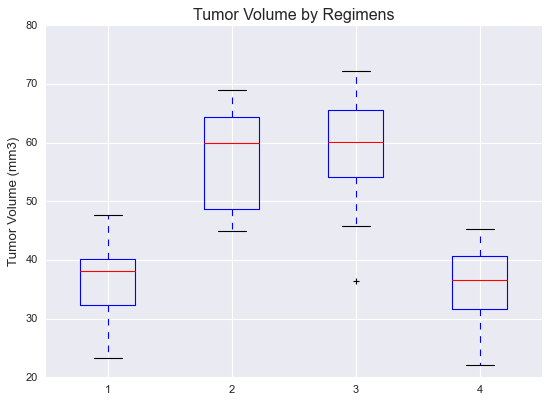

In [989]:
plt.style.use('seaborn-darkgrid')
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig3, ax3 = plt.subplots();
ax3.set_title('Tumor Volume by Regimens');
ax3.set_ylabel('Tumor Volume (mm3)');
ax3.boxplot(tumor);
plt.show();

## Line and Scatter Plots

In [990]:
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


### line chart

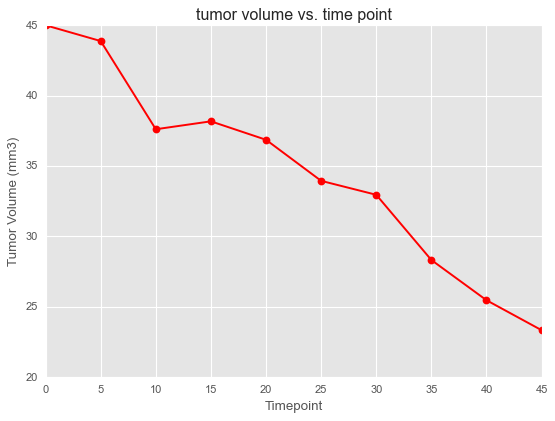

In [991]:
plt.style.use('ggplot')
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#dataset
Capomulin = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin'][['Mouse ID','Tumor Volume (mm3)','Timepoint']]

mouse = Capomulin[Capomulin['Mouse ID'] == 's185']
mouse

x_axis = list(mouse['Timepoint'])
y_axis = list(mouse['Tumor Volume (mm3)'])

#lince chart
fig4, ax4 = plt.subplots();
ax4.plot(x_axis,y_axis, color='red', marker='o');
ax4.set(title = "tumor volume vs. time point",
        xlabel= "Timepoint",
        ylabel = "Tumor Volume (mm3)");


### Scatter Plot

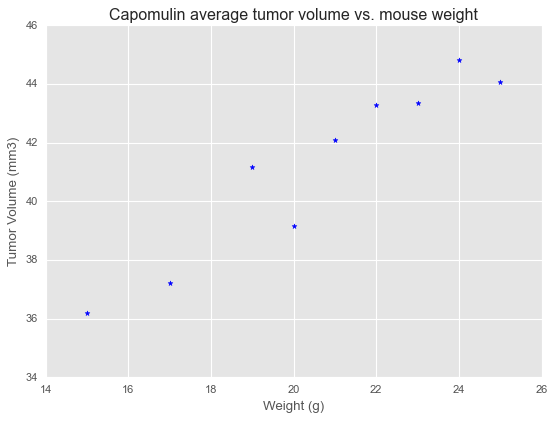

In [992]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Dataset
avg_tumor = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin'][['Mouse ID','Weight (g)','Tumor Volume (mm3)']]
avg_tumor = pd.DataFrame(avg_tumor.groupby(['Weight (g)'])['Tumor Volume (mm3)'].agg('mean')).reset_index().rename(columns = {'Tumor Volume (mm3)': 'avg_tumor_vol'})

#axis
x_axis = list(avg_tumor['Weight (g)'])
y_axis = list(avg_tumor['avg_tumor_vol'])

# scatter plot
fig5, ax5 = plt.subplots();
ax5.scatter(x_axis, y_axis, color='blue', marker="*");
ax5.set(title = "Capomulin average tumor volume vs. mouse weight",
        xlabel = "Weight (g)",
        ylabel = "Tumor Volume (mm3)");

plt.show();

## Correlation and Regression

In [993]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#Dataset
avg_tumor

#axis
x_axis = avg_tumor['Weight (g)']
y_axis = avg_tumor['avg_tumor_vol']

#correlation coefficient
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume is 0.95


In [ ]:
# Print out the r-squared value along with the plot.
x_values = housing_data['RM']
y_values = housing_data['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.9034966277438606


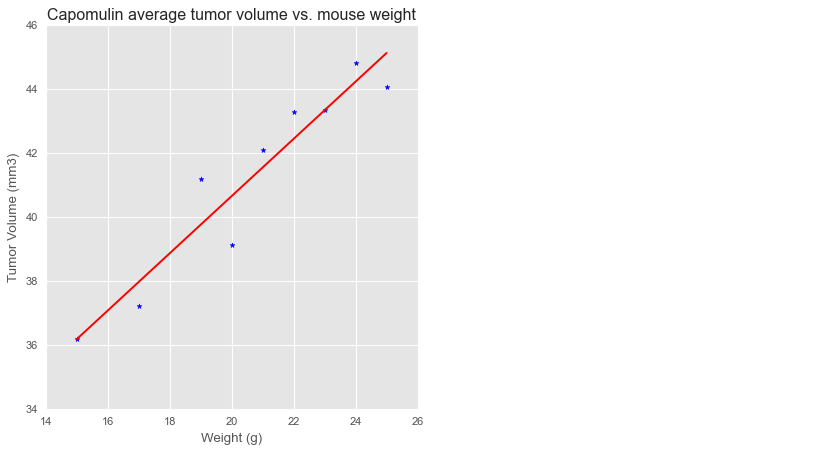

In [1009]:
#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatter plot
fig5, ax5 = plt.subplots(figsize = (6,6));
ax5.scatter(x_axis, y_axis, color='blue', marker="*");
ax5.plot(x_axis,regress_values,"r-");
ax5.annotate(line_eq,(35,35),fontsize=15,color="red");
ax5.set(title = "Capomulin average tumor volume vs. mouse weight",
        xlabel = "Weight (g)",
        ylabel = "Tumor Volume (mm3)");
print(f"The r-squared is: {rvalue**2}")

plt.show();


